In [2]:
from cmp import *
% matplotlib notebook

<IPython.core.display.Javascript object>


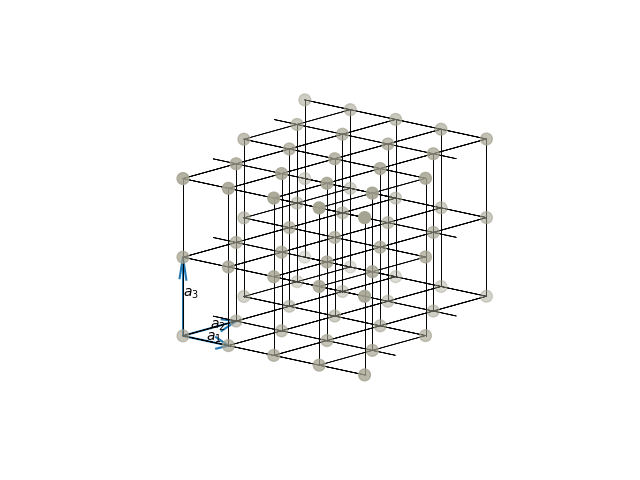

In [3]:
# Inputs

# Lattice vectors (3 vectors of length 3)
a = 1
b = 2
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([0, 0, 1])
theta = 80*np.pi/180

# Array of basis vectors
basis = np.array([[0,0,0],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]])
# Colors for each of the basis vectors
colors = ('xkcd:cement','b','b','b')
# Size multiplier for each of the atoms. Default is 1
sizes = (2,1,1,1)


# Gridline type:
# Hard: lines along cartesian axes at integer spacings
# Soft: Lines along cartesian axes. Takes into account nonequal lattice spacing
# LatticeVectors: Lines along the latticevectors (only on lattice points)
GridType = "lattice"

# Limit type:
# Hard: Sets a hard limit on the plotting boundary (default  x = y = z = [0,2])
# Dynamic: Sets the limits as max(nx*a1,ny*a2,nz*a3), so we include nx unitcells in the a1 direction, etc.
# WDynamic: Sets the limits r_min = n_min*[a1 a2 a3] and likewise for n_max
LimType = "dynamic"
Maxs = [4,4,2]
Mins = [0,0,0]

#LatticeCreator(a1,a2,a3,basis,colors,sizes,LimType,GridType,Mins,Maxs)
LatticeCreator(Lattice="hexagonal 1", colors=["xkcd:cement","b","b","b"],LimType=LimType,Maxs=Maxs)

In [45]:
def rotate(a1,a2,a3,basis,R):
    """
    Rotates the lattice
    """
    return R@a1, R@a2, R@a3, (R@basis.T).T
    
def rotator(a1,a2,a3,basis,verb=False):
    """
    Rotates the lattice to make plotting gridlines easier
    """
    # We remember, that |a x b| = |a| |b| sin(theta)
    eq = np.isclose
    x = np.array([1,0,0])
    y = np.array([0,1,0])
    # Check for orthogonality
    ortho12 = eq(0, np.dot(a1, a2))
    ortho31 = eq(0, np.dot(a1, a3))
    ortho23 = eq(0, np.dot(a2, a3))
    
    if verb:
        print("Before:")
        print(a1)
        print(a2)
        print(a3)
        print(basis)
    
    if ortho12:
        # We choose a1 to align along x
        a1cross = np.cross(a1,x)
        theta = np.arcsin(mag(a1cross)/mag(a1))
        r1 = RotMatrix(a1cross, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r1)
        
        # Now we align a2 along y
        # But we gotta make sure we rotate in the right direction
        a2cross = np.cross(a2,y)
        sign = np.sign(a2cross)[0]
        theta = sign * np.arcsin(mag(a2cross)/mag(a2))
        r2 = RotMatrix(x, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r2)
    elif ortho23:
        # We choose a2 to align along x
        a2cross = np.cross(a2,x)
        theta = np.arcsin(mag(a2cross)/mag(a2))
        r2 = RotMatrix(a2cross, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r2)
        
        # Now we align a3 along y
        a3cross = np.cross(a3,y)
        sign = np.sign(a3cross)[0]
        theta = sign * np.arcsin(mag(a3cross)/mag(a3))
        r3 = RotMatrix(x, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r3)
    elif ortho31:
        # We choose a1 to align along x
        a1cross = np.cross(a1,x)
        theta = np.arcsin(mag(a1cross)/mag(a1))
        r1 = RotMatrix(a1cross, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r1)
        
        # Now we align a2 along y
        a3cross = np.cross(a3,y)
        sign = np.sign(a3cross)[0]
        theta = sign * np.arcsin(mag(a3cross)/mag(a3))
        r3 = RotMatrix(x, theta)
        a1, a2, a3, basis = rotate(a1,a2,a3,basis,r3)
    else:
        # Well, it doesn't really matter here, if none of them are orthogonal to each other. We'll just use latticevector gridlines and leave this be.
        pass
    
    if verb:
        print("after")
        print(a1)
        print(a2)
        print(a3)
        print(basis)
        
    return a1,a2,a3,basis

In [46]:
R = RotMatrix()
lattices = ["simple cubic", "fcc", "bcc", "conventional fcc",
                "conventional bcc", "base centred cubic", "tetragonal",
                "tetragonal body centred", "tetragonal face centred",
                "tetragonal base centred", "orthorhombic",
                "orthorhombic base centred", "orthorhombic body centred",
                "orthorhombic face centred", "simple monoclinic",
                "base centred monoclinic 1", "base centred monoclinic 2",
                "base centred monoclinic 3", "hexagonal 1", "hexagonal 2",
                "triclinic", "rhombohedral"]
for name in lattices:
    # Create the lattice
    lattice, basis = LatticeChooser(name)
    # rotate the lattice and basis
    lattice = (R@lattice.T).T
    basis = (R@basis.T).T
    a1,a2,a3 = lattice
    a1,a2,a3,basis = rotator(a1,a2,a3,basis,verb=True)

simple cubic
Before:
[ 0.80473785  0.50587936 -0.31061722]
[-0.31061722  0.80473785  0.50587936]
[ 0.50587936 -0.31061722  0.80473785]
[ 0.  0.  0.]
after
[  1.00000000e+00  -2.78466566e-17   1.41267742e-17]
[  5.55111512e-17   1.00000000e+00  -5.55111512e-17]
[ -2.77555756e-17   5.55111512e-17   1.00000000e+00]
[ 0.  0.  0.]
fcc
Before:
[ 0.24706032  0.65530861  0.09763107]
[ 0.65530861  0.09763107  0.24706032]
[ 0.09763107  0.24706032  0.65530861]
[ 0.  0.  0.]
after
[ 0.24706032  0.65530861  0.09763107]
[ 0.65530861  0.09763107  0.24706032]
[ 0.09763107  0.24706032  0.65530861]
[ 0.  0.  0.]
bcc
Before:
[ 0.80473785  0.50587936 -0.31061722]
[-0.31061722  0.80473785  0.50587936]
[ 0.5  0.5  0.5]
[ 0.  0.  0.]
after
[  1.00000000e+00  -2.78466566e-17   1.41267742e-17]
[  5.55111512e-17   1.00000000e+00  -5.55111512e-17]
[ 0.5  0.5  0.5]
[ 0.  0.  0.]
conventional fcc
Before:
[ 0.80473785  0.50587936 -0.31061722]
[-0.31061722  0.80473785  0.50587936]
[ 0.50587936 -0.31061722  0.8047378